Exercicio 6 - SAA0336\
Nome: Alessandro Melo de Oliveira\
Nº USP: 10788662

In [13]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot
from numpy.polynomial import Polynomial
from scipy.integrate import quad

In [14]:
b = 2260.5/1000 #envergadura [m]
S = (928554.75 / 1e6) # area da asa [m^2]

K = 0

Cn = 1.987258
Cl_alpha_inf = Cn #aproximando o Cl pelo Cn calculado no método de stender

alpha_max = np.deg2rad(15) # 15º graus máximo ângulo de ataque positivo

V_2 = 29.5 # [m/s]

pressao_dinamica = 0.5 * 1.225 * (V_2**2)

In [15]:
A,B, x, y = sp.symbols('A,B, x, y')

def corda_real(posicao, graph = False):
    
    x = sp.Symbol('x')

    x1, y1 = 0.6, 0.525
    x2, y2 = b, 0.214

    coefficients = np.polyfit([x1,x2], [y1,y2], 1)

    slope = coefficients[0]
    intercept = coefficients[1]

    exp1 = 0.525
    exp2 = slope*x + intercept

    Cg = sp.Piecewise((exp1, (x >= 0)  & (x <= 0.6)), ((exp2, (x > 0.6) & (x <= b))))
    
    if graph == True:
        
        fig_cg = plt.figure(figsize=(6,4))
        range_cg = np.linspace(0,b,500)
        plt.plot(range_cg, [Cg.subs(x,i) for i in range_cg])
        plt.grid()
        plt.xlabel("Posição da corda [m]", fontsize = 12)
        plt.ylabel("Corda [m]", fontsize = 12)
        plt.title("0.525 para 0 < y < 0.6 \n 0.6373 - 0.1872y para 0.6 < y < 2.2605", fontsize = 12)
    
    return Cg, Cg.subs({x:posicao})

In [28]:
corda_real(0.6)[0]

Piecewise((0.525, (x >= 0) & (x <= 0.6)), (0.637375790424571 - 0.187292984040951*x, (x <= 2.2605) & (x > 0.6)))

In [16]:
posicoes_analisadas = [0, 0.086, 0.386, 0.748, 1.04325, 1.33775, 1.63225, 1.89975, 2.14025, 2.2605]

In [17]:
def c_barra_fun():
    c_barra_sum = 0
    for i in posicoes_analisadas:
        c_barra_sum += corda_real(i)[1]
    return c_barra_sum/len(posicoes_analisadas)

c_barra = c_barra_fun()

In [30]:
c_barra

0.396484236675700

In [18]:
def dcl_alpha_inf_fun():
    numerador = 0
    denominador = c_barra
    for i in range(0,len(posicoes_analisadas)):
        numerador += Cl_alpha_inf * corda_real(posicoes_analisadas[i])[1]
        
    cl_alpha_barra = numerador/(denominador)

    return float(cl_alpha_barra)

cl_alpha_inf = dcl_alpha_inf_fun()

In [31]:
cl_alpha_inf

19.87258

In [19]:
def dcl_dalpha_fun():
    return (cl_alpha_inf / (1 + cl_alpha_inf * (S/(np.pi * (2*b)**2)) * (1+K)))

dcl_dalpha = dcl_dalpha_fun()

In [20]:
def dL_dy_fun():
    return 0.5 * pressao_dinamica * dcl_dalpha * alpha_max * (corda_real(0)[0] + 
                                                               (4/sp.pi) * c_barra * sp.sqrt(1 - (2*x/(2*b))**2))

dL_dy = dL_dy_fun()

In [37]:
sp.simplify(dL_dy)

Piecewise((1708.14690133247*sqrt(1 - 0.195700068314001*x**2)/pi + 565.455723232861, (x >= 0) & (x <= 0.6)), (-201.725504280604*x + 1708.14690133247*sqrt(1 - 0.195700068314001*x**2)/pi + 686.491025801223, (x <= 2.2605) & (x > 0.6)))

In [21]:
range_envergadura = np.linspace(0,b,500,endpoint=True)
dL_dy_plot = []
    
for i in range_envergadura:
    dL_dy_plot.append((dL_dy.subs({x:i})).evalf())

In [22]:
def poly_shrek_fun():
    
    x = np.asarray(range_envergadura[:-1], dtype=np.float32)
    y = np.asarray(dL_dy_plot[:-1], dtype=np.float32)
    
    poly = Polynomial.fit(x,y,deg = 15)
    
    return poly
    
poly_shrenk = poly_shrek_fun()

In [23]:
distancias = [0, 172, 600, 896, 1190.50, 1485, 1779.5, 2020, 2260.5]
distancias = [i/1000 for i in distancias]

In [38]:
Li_list_stender = [47.70202415601447,
 165.97807888355433,
 196.49904026930835,
 148.51200210963472,
 133.77156515971186,
 117.30670740896011,
 89.48003123012053,
 62.327264865858474,
 20.05580268030824]

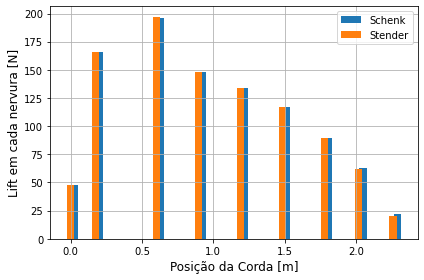

In [53]:
def lift_per_nerv(graph = False):
    Li_list = []
    dx_list = posicoes_analisadas
    dx_list_2 = distancias
    
    for i in range(0, len(dx_list) - 1):
        a = dx_list[i]
        b = dx_list[i+1]
        
        Li = quad(poly_shrenk, a,b)[0]
        Li_list.append(Li/2)
        
        
    if graph == True:
        plt.bar([i + 0.03 for i in dx_list_2], Li_list, width=0.05, alpha = 1, label = "Schenk")
        plt.bar(dx_list_2, Li_list_stender, width=0.05, alpha = 1, label = "Stender", lw = 1)
        plt.grid()
        plt.xlabel("Posição da Corda [m]", fontsize = 12)
        plt.ylabel("Lift em cada nervura [N]", fontsize = 12)
        plt.legend()
        plt.tight_layout()
        
    #return Li_list

lift_per_nerv(True)